**Problem Statement:**

Walmart aims to optimize its marketing strategies and product placement by understanding how customer gender, along with other relevant factors, influences purchase amounts. The problem is to develop a predictive model and actionable insights that identify significant relationships between customer demographics, purchase behavior, and external factors, ultimately leading to increased revenue and improved customer satisfaction."

In [ ]:
# Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#importing the data set
df=pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [ ]:
# Observing the unique values
df.nunique()

,0
User_ID,5891
Product_ID,3631
Gender,2
Age,7
Occupation,21
City_Category,3
Stay_In_Current_City_Years,5
Marital_Status,2
Product_Category,20
Purchase,18105


**Observation**: There is no unique ID in the data set

In [ ]:
#Observing the data types
df.dtypes

,0
User_ID,int64
Product_ID,object
Gender,object
Age,object
Occupation,int64
City_Category,object
Stay_In_Current_City_Years,object
Marital_Status,int64
Product_Category,int64
Purchase,int64


In [ ]:
#Observing Structure of the data set
df.shape

(550068, 10)

**Observation:** There are 550068 rows and 10 columns

In [ ]:
#Observing duplicate values
df.duplicated().sum()

np.int64(0)

Observation: There are no duplicate values

In [ ]:
#Observing the missing values  of the data set
df.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


**Observation:** There are no missing values in the data set

**Observing the outliers of the continuous variables using box plot**

Text(0, 0.5, 'Occupation')

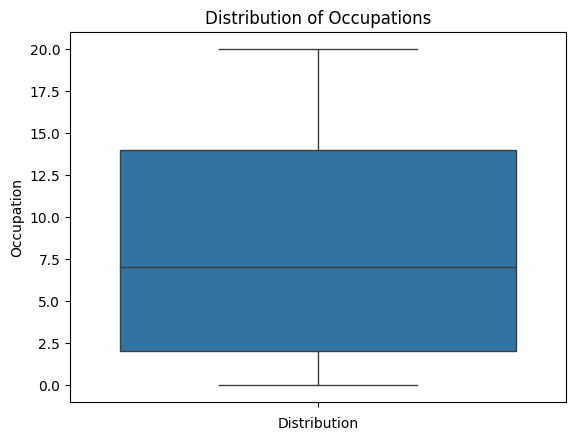

In [ ]:
# outliers for occupation

sns.boxplot(data=df,y='Occupation')
plt.title('Distribution of Occupations')
plt.xlabel('Distribution')
plt.ylabel('Occupation')

Interpretation: There are no outliers in the data and distribution almost symmentrical inside the IQR because median is approximately closer to center and positively skewed outside the IQR as length of upper whisker is more

Text(0, 0.5, 'Purchase')

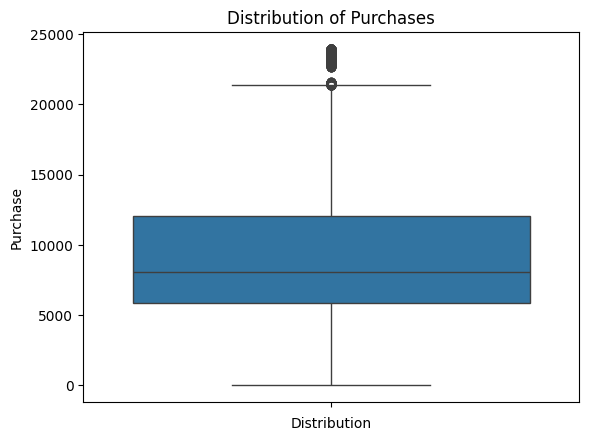

In [ ]:
#outliers for Purchase
sns.boxplot(data=df,y='Purchase')
plt.title('Distribution of Purchases')
plt.xlabel('Distribution')
plt.ylabel('Purchase')

**Interpretation:** There are outliers in purchase column

Text(0, 0.5, 'Product Category')

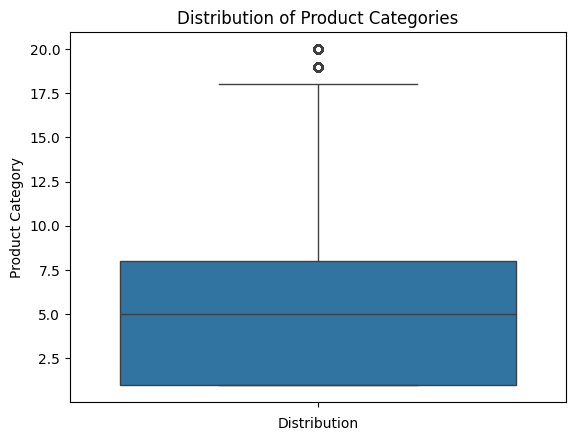

In [ ]:
sns.boxplot(data=df,y='Product_Category')
plt.title('Distribution of Product Categories')
plt.xlabel('Distribution')
plt.ylabel('Product Category')

**Interpretation:** There are two outliers in product category

Text(0, 0.5, 'Years')

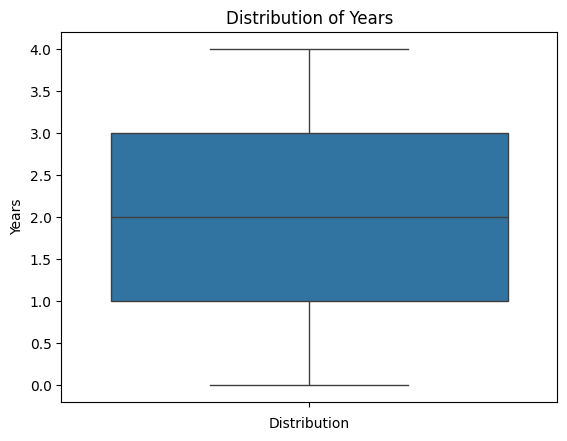

In [ ]:
# Creating a new feature from Stay_In_Current_City_Years to check for outliers
df['years'] = df['Stay_In_Current_City_Years'].str.replace('+', '', regex=False)
df['years'] = pd.to_numeric(df['years'], errors='coerce')
sns.boxplot(data=df,y='years')
plt.title('Distribution of Years')
plt.xlabel('Distribution')
plt.ylabel('Years')

**Interpretation**: There are no outliers in years column

**Clipping the data between the 5 percentile and 95 percentile for product category and purchase**

In [ ]:
#clipping for product catergory
lower_bound_cat=np.percentile(df['Product_Category'],5) # calculating 5th percentile
Upper_bound_cat=np.percentile(df['Product_Category'],95) # calculating 95th percentile
# creation of new variable with the clip function
df['Product_Category_clipped']=np.clip(df['Product_Category'],lower_bound_cat,Upper_bound_cat)

#clipping for Purchase
lower_bound_pur=np.percentile(df['Purchase'],5)
Upper_bound_pur=np.percentile(df['Purchase'],95)
df['Purchase_clipped']=np.clip(df['Purchase'],lower_bound_pur,Upper_bound_pur)

**Data Exploration**

Text(0, 0.5, 'Unique Products Count')

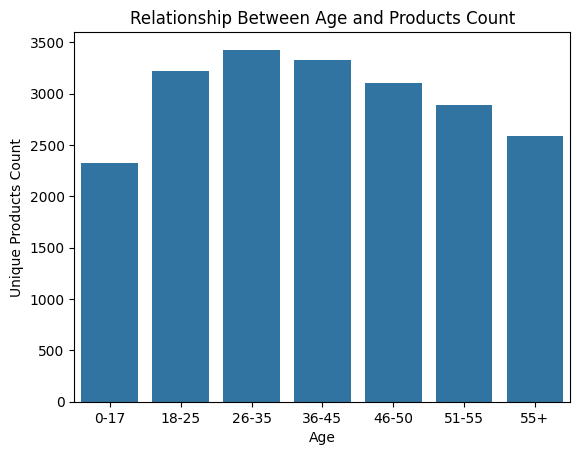

In [ ]:
# Finding the relationship between age bins and products
df_age_products=df.groupby('Age')['Product_ID'].nunique().reset_index() # Grouping using age bins

# Visual representation
sns.barplot(data=df_age_products,x='Age',y='Product_ID')
plt.title('Relationship Between Age and Products Count')
plt.ylabel('Unique Products Count')



**Interpretation:**
Purchasing trend is increasing till 35 years and then there is decline in the purchase

**Finding relationship between age, marital status, and the amount spent**

Text(0, 0.5, 'Unique Produt Counts')

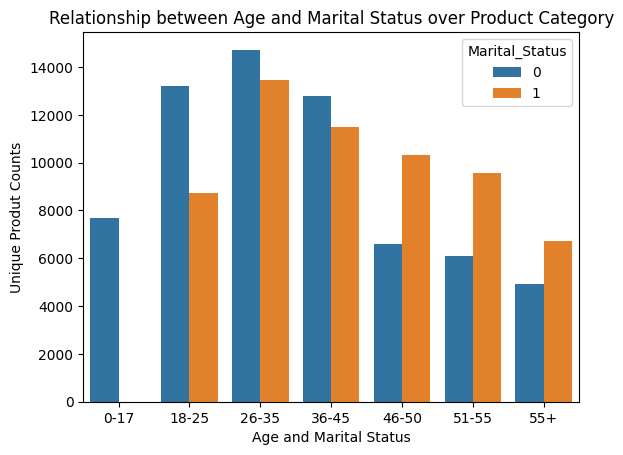

In [ ]:
# Performing multi variable analysis by grouping age and marital status against purchase
df_age_marital=df.groupby(by=['Age','Marital_Status'])['Purchase'].agg(['mean','nunique','std','median']).reset_index()

# Visual Analysis
sns.barplot(data=df_age_marital,x='Age',y='nunique',hue='Marital_Status')
plt.title('Relationship between Age and Marital Status over Product Category')
plt.xlabel('Age and Marital Status')
plt.ylabel('Unique Produt Counts')

**Interpretation:** The plot reveals that the 26-35 and 36-45 age groups have the highest engagement with a diverse set of "Product IDs," and marital status "0" generally shows a higher engagement with unique "Product IDs" across most age groups

**Finding preferred product categories for different genders**

Text(0, 0.5, 'Frequency')

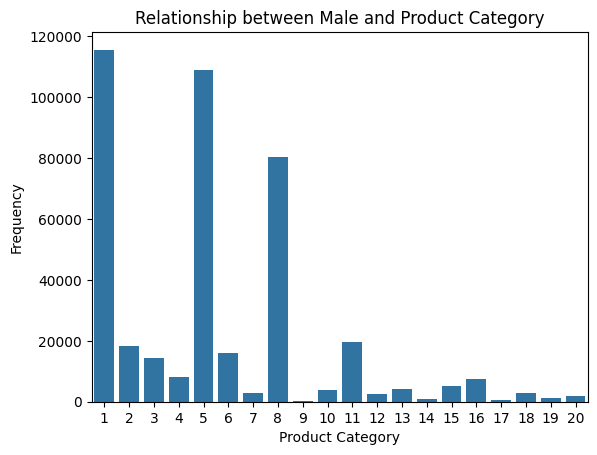

In [ ]:
df_gender_M=df[df['Gender']=='M'] # filtering data frame where gender is male
#Visual Analysis
sns.countplot(data=df_gender_M,x='Product_Category')
plt.title('Relationship between Male and Product Category')
plt.xlabel('Product Category')
plt.ylabel('Frequency')

**Interpretation:**
The plot reveals a highly skewed distribution of product categories, with category 1 being exceptionally dominant, followed by category 5. Most other categories have relatively low frequencies.

Text(0, 0.5, 'Frequency')

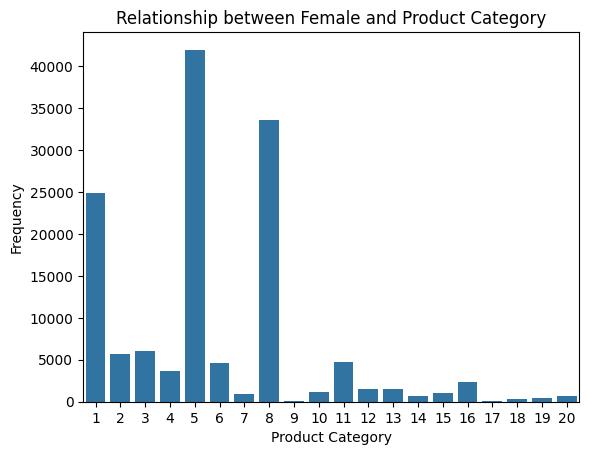

In [ ]:
df_gender_F=df[df['Gender']=='F'] # filtering data frame where gender is male
#Visual Analysis
sns.countplot(data=df_gender_F,x='Product_Category')
plt.title('Relationship between Female and Product Category')
plt.xlabel('Product Category')
plt.ylabel('Frequency')

**Interpretation:**

The plot reveals a skewed distribution of product categories, with category 6 being the most dominant, followed by categories 8 and 1. Many other categories have relatively low frequencies.

# **Analysis of how gender affect the amount spent**

In [ ]:
# calculating confidence interval using clt
from scipy.stats import norm
def clt_confidence_interval(data):
  mean=round(np.mean(data),1)
  standard_deviation=np.std(data,ddof=1)
  n=len(data)
  z_score=norm.ppf(0.975)
  marginal_error=round((z_score*(standard_deviation/np.sqrt(n))),0)
  return (mean-marginal_error,mean+marginal_error)


#calculating bootstrap confidence interval
def bootstrap_confidence_interval(data,iteration=1000):
  means=[]
  for i in range(iteration):
    sample=np.random.choice(data,size=len(data),replace=True)
    means.append(round(np.mean(sample),1))
  return np.percentile(means,[2.5,97.5])

#Analysing gender spending
gender_values=df['Gender'].unique()
sample_size=[len(df),300,3000,30000]
for i in gender_values:
  gender_data=df[df['Gender']==i]['Purchase']
  print(f'\nGender={i}:')
  for j in sample_size:
    if j<len(gender_data):
        samples=np.random.choice(gender_data,size=j,replace=False)
    else:
        samples=gender_data
    print(f'\nSample Size={j}')
    print(f'CLT Confidence Interval={clt_confidence_interval(samples)}')
    print(f'Bootstrap Confidence Interval={bootstrap_confidence_interval(samples,iteration=1000)}')


Gender=F:

Sample Size=550068
CLT Confidence Interval=(np.float64(8709.6), np.float64(8759.6))
Bootstrap Confidence Interval=[8709.285 8761.11 ]

Sample Size=300
CLT Confidence Interval=(np.float64(8044.5), np.float64(9040.5))
Bootstrap Confidence Interval=[8056.57   9033.6425]

Sample Size=3000
CLT Confidence Interval=(np.float64(8532.5), np.float64(8872.5))
Bootstrap Confidence Interval=[8528.955 8856.705]

Sample Size=30000
CLT Confidence Interval=(np.float64(8701.8), np.float64(8809.8))
Bootstrap Confidence Interval=[8704.3975 8807.3075]

Gender=M:

Sample Size=550068
CLT Confidence Interval=(np.float64(9421.5), np.float64(9453.5))
Bootstrap Confidence Interval=[9422.2975 9454.3025]

Sample Size=300
CLT Confidence Interval=(np.float64(9078.5), np.float64(10176.5))
Bootstrap Confidence Interval=[ 9090.385  10137.0375]

Sample Size=3000
CLT Confidence Interval=(np.float64(9392.3), np.float64(9758.3))
Bootstrap Confidence Interval=[9393.59  9753.225]

Sample Size=30000
CLT Confidence

**Interpretation:**

1.   **Analysing the confidence interval computed using the entire dataset wider for one of the genders**

 *   The CLT confidence interval for Gender=F (50) is wider than the CLT confidence interval for Gender=M (32).

 *   The Bootstrap confidence interval for Gender=F (51.22) is wider than the Bootstrap confidence interval for Gender=M (32)

 *   Therefore, the confidence intervals computed using the entire dataset (sample size 550068) are wider for Gender=F compared to Gender=M indicating less precise estimate of the average "Amount Spent" for Gender=F compared to Gender=M

2.  **Effect on width of the confidence interval affected by the sample size**

 *   As the sample size increases, the width of the confidence interval decreases
 *   This confirms the inverse relationship between sample size and interval width indicating increased precision and reduced uncertainty in estimating the population mean


3.  **An analysis of overlapping confidence intervals for different sample sizes**

 *   There are confidence intervals for different sample sizes overlap in the results
 *   This implies that while the precision of the mean estimate improves with larger sample sizes, there's still a range of values where the true population means could possibly lie for all the sample sizes


4. **Analysis of sample size affect the shape of the distributions of the means**

 *   With very large sample sizes, the distribution of the means is very close to normal
 *   With small sample sizes, the distribution of the means can deviate from normal
 *   As the sample size increases, the distribution of the means converges towards a normal distribution, as predicted by the CLT

# **Analysis of the Effect of Marital Status on Amount Spent**

In [ ]:
#Analysing spending against marital status
Marital_values=df['Marital_Status'].unique()
sample_size=[len(df),300,3000,30000]
for i in Marital_values:
  Marital_data=df[df['Marital_Status']==i]['Purchase']
  print(f'\nMarriage Status={i}:')
  for j in sample_size:
    if j<len(Marital_data):
        samples=np.random.choice(Marital_data,size=j,replace=False)
    else:
        samples=Marital_data
    print(f'\nSample Size={j}')
    print(f'CLT Confidence Interval={clt_confidence_interval(samples)}')
    print(f'Bootstrap Confidence Interval={bootstrap_confidence_interval(samples,iteration=1000)}')



Marriage Status=0:

Sample Size=550068
CLT Confidence Interval=(np.float64(9248.9), np.float64(9282.9))
Bootstrap Confidence Interval=[9249.2925 9282.9075]

Sample Size=300
CLT Confidence Interval=(np.float64(8901.2), np.float64(10055.2))
Bootstrap Confidence Interval=[ 8893.705  10039.0175]

Sample Size=3000
CLT Confidence Interval=(np.float64(8943.8), np.float64(9299.8))
Bootstrap Confidence Interval=[8945.2925 9302.165 ]

Sample Size=30000
CLT Confidence Interval=(np.float64(9193.0), np.float64(9307.0))
Bootstrap Confidence Interval=[9195.5    9305.8075]

Marriage Status=1:

Sample Size=550068
CLT Confidence Interval=(np.float64(9240.2), np.float64(9282.2))
Bootstrap Confidence Interval=[9240.0975 9280.6025]

Sample Size=300
CLT Confidence Interval=(np.float64(8586.9), np.float64(9672.9))
Bootstrap Confidence Interval=[8585.4325 9692.3675]

Sample Size=3000
CLT Confidence Interval=(np.float64(8968.4), np.float64(9322.4))
Bootstrap Confidence Interval=[8966.0925 9311.8225]

Sample S

**Interpretation:**

1.   **Analysing the confidence interval computed using the entire dataset wider for Marital status**

 *   The CLT confidence interval for Marriage Status=1 (42) is slightly wider than the CLT confidence interval for Marriage Status=0 (34).
 *   The Bootstrap confidence interval for Marriage Status=1 (39.5025) is   slightly wider than the Bootstrap confidence interval for Marriage Status=0
(34.6)

 *   Therefore, the confidence intervals computed using the entire dataset (sample size 550068) are slightly wider for Marriage Status=1 compared to Marriage Status=0 indicating  less precise estimate of the average "Amount Spent" for Marriage Status=1 compared to Marriage Status=0.


2.  **Effect on width of the confidence interval affected by the sample size**

 *   As the sample size increases, the width of the confidence interval decreases.
 *   This confirms the inverse relationship between sample size and interval width indicating increased precision and reduced uncertainty in estimating the population mean.


3.  **An analysis of overlapping confidence intervals for different sample sizes**

 *   There are confidence intervals for different sample sizes overlap in the results
 *   This implies that while the precision of the mean estimate improves with larger sample sizes, there's still a range of values where the true population means could possibly lie for all the sample sizes


4. **Analysis of sample size affect the shape of the distributions of the means**

 *   With very large sample sizes, the distribution of the means is very close to normal
 *   With small sample sizes, the distribution of the means can deviate from normal
 *   As the sample size increases, the distribution of the means converges towards a normal distribution, as predicted by the CLT


# **Analysis of the Effect of Age on Amount Spent**

In [ ]:
Age_values=df['Age'].unique()
sample_size=[len(df),300,3000,30000]
for i in Age_values:
  Age_data=df[df['Age']==i]['Purchase']
  print(f'\nAge Bin={i}:')
  for j in sample_size:
    if j<=len(Age_data):

      if j<len(Age_data):
        samples=np.random.choice(Age_data,size=j,replace=False)
      else:
        samples=Age_data
      print(f'\nSample Size={j}')
      print(f'CLT Confidence Interval={clt_confidence_interval(samples)}')
      print(f'Bootstrap Confidence Interval={bootstrap_confidence_interval(samples,iteration=1000)}')
    else:
      print(f'Sample size={j}')
      print('Sample size is greater than population')





Age Bin=0-17:
Sample size=550068
Sample size is greater than population

Sample Size=300
CLT Confidence Interval=(np.float64(7919.5), np.float64(9101.5))
Bootstrap Confidence Interval=[7909.4975 9136.0375]

Sample Size=3000
CLT Confidence Interval=(np.float64(8731.5), np.float64(9099.5))
Bootstrap Confidence Interval=[8721.4975 9096.6575]
Sample size=30000
Sample size is greater than population

Age Bin=55+:
Sample size=550068
Sample size is greater than population

Sample Size=300
CLT Confidence Interval=(np.float64(8969.0), np.float64(10059.0))
Bootstrap Confidence Interval=[ 8984.395  10022.5125]

Sample Size=3000
CLT Confidence Interval=(np.float64(9446.7), np.float64(9822.7))
Bootstrap Confidence Interval=[9441.465 9814.505]
Sample size=30000
Sample size is greater than population

Age Bin=26-35:
Sample size=550068
Sample size is greater than population

Sample Size=300
CLT Confidence Interval=(np.float64(8274.0), np.float64(9434.0))
Bootstrap Confidence Interval=[8310.3175 9392.

**Interpretation:**

1.   **Analysing the confidence interval computed using the entire dataset wider for Age bins**

 *   The code shows "Sample size is greater than population" for the entire dataset (Sample size=550068) in all age bins because the number of unique purchase values within each age bin is less than the total sample size of the original dataframe.
 *   It is only calculating the confidence intervals for the sample sizes of 300, 3000 and 30000. Therefore, we cannot compare the width of the confidence intervals of the entire dataset.

2.  **Effect on width of the confidence interval affected by the sample size**

 *  As the sample size increases (from 300 to 3000 to 30000), the width of the confidence intervals generally decreases for both CLT and Bootstrap methods across all age bins.
 *  The confidence intervals for sample size 300 are the widest, and the intervals for sample size 30000 are the narrowest.

 * As the sample size increases, the width of the confidence interval decreases. This confirms the inverse relationship between sample size and interval width indicating increased precision and reduced uncertainty in estimating the population mean.

3.  **An analysis of overlapping confidence intervals for different sample sizes**

 *   The intervals for the small sample size (300) have a large range, and therefore overlap with all of the other sample sizes. Also, the intervals calculated for the 3000 and 30000 sample sizes overlap.

 *   Overlapping confidence intervals indicate that there is no strong statistical evidence to suggest that the mean "Purchase" values are significantly different across the various sample sizes.

 *   This implies that while the precision of the mean estimate improves with larger sample sizes, there's still a range of values where the true population means could possibly lie for all the sample sizes

4. **Analysis of sample size affect the shape of the distributions of the means**

 *   For larger sample sizes (30000), the CLT and Bootstrap confidence intervals are closer together, suggesting that the distribution of the means is approaching a normal distribution.
 *   For smaller sample sizes (300), there is a greater difference between the CLT and Bootstrap intervals, indicating potential deviations from normality.
 *   Therefore, as the sample size increases, the distribution of the means converges towards a normal distribution, as predicted by the CLT


# **Creating the report**

# **Analysis of The confidence intervals for the average amount spent by males and females**

**Checking for overlapping:**
*   The confidence interval for females is (8709.6, 8759.6) and The confidence interval for males is (9421.5, 9453.5)
*   There is no overlap between these two intervals. The upper bound of the female interval (8759.6) is much lower than the lower bound of the male interval (9421.5).

**Conclusion:**


*   This suggests that there is a statistically significant difference in the average spending between males and females in this dataset. Specifically, males spend more than females.

**Leveraging the conclusion:**


*   Since males spend more on average, walmart could create promotions or product bundles that appeal specifically to male shoppers.
*   For females, focus on value-oriented campaigns or promotions on items that are more frequently purchased by women.
*   Walmart can improve the online and offline shopping experience to be more tailored to each gender
*   Walmart can explore whether there are price sensitivities that differ between genders and also product categories that contribute to the spending differences between genders.


# **Analysis of the confidence intervals for the average amount spent by married and unmarried individuals**

**Checking for overlapping:**
*   The confidence interval for unmarried individuals is (9248.9, 9282.9) and The confidence interval for married individuals is (9240.2, 9282.2)
*   Therefore, it is accurate to say that the confidence interval for married individuals is lying within the confidence interval of unmarried individuals.

**Conclusion:**

*   This further emphasizes that there's no statistically significant difference in the average spending between the two groups implies that that the average spending of the married group could be the same as the unmarried group.

**Leveraging the conclusion:**

*   Instead of creating separate marketing campaigns tailored to married or unmarried individuals, Walmart should focus on broader, more inclusive campaigns.
*   Use purchase history and browsing behavior to provide personalized recommendations, rather than relying on assumed marital status.
*   Investigate if there are differences in what married and unmarried individuals purchase, even if the amount spent is similar.


# **Analysis of the confidence intervals for the average amount spent by Age**

**Checking for overlapping:**

*   we can make observations using the confidence intervals that were calculated for the smaller sample sizes (300, 3000, 30000) as all data intervals did not exist
*   There is significant overlap between the confidence intervals of the following age ranges.
   * age bin 26-35, 46-50, and 18-25 all have a very similar range, and therefore overlap.
   * age bin 36-45 has a small overlap with the previously mentioned age ranges.
   * age bin 51-55 is significantly higher than all of the other age ranges, and therefore does not overlap with the other age ranges.

**Leveraging the conclusion:**   

*   for age groups with overlapping intervals 26-35, 46-50, 18-25, and 36-45 targeted ads should be created , similarly for non-overlapping interval 51-55
*   Walmart can analyze the specific products and categories that are popular among this age group

# **Recommendations**

*   Gender has no similarity in purchase, so independent relevant products suggestions should be performed and focus more on type of product categories that are contributing more purchase value
*   Married and un married individuals have no difference in purchase value, so intead of targeted ads, focus more on types and quantity of products purchase also track the browsing history and order history

*   There are range of age having similar purchase value, promote products more useful and relevant for respective similar age bins
*   As the analysis for age bins is performed with less sample size,performing the analysis with larger sample will produce more accurate results



